In [1]:
print('hello !')

hello !


In [2]:
#---------------------------------------------
# CHARGEMENT DES OBSERVATIONS
#---------------------------------------------

import pandas as pd
from tensorflow.python.ops.gen_data_flow_ops import tensor_array
sonar = pd.read_csv("sonar.all-data.csv", header = None)
sonar.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   R  
3  0.0040  0.0117   R  
4  0.0107  0.0094   R  

[5 rows x 61 columns]

# 12 neuronnes

In [3]:
#---------------------------------------------
# PREPARATION DES DONNEES
#---------------------------------------------

print("Nbr colonnes: ", len(sonar.columns))
#On ne prend que les données issues du sonar pour l'apprentissage
X = sonar[range(60)].values

#On ne prend que les libellé
y = sonar[60].values

#On encode : Les mines sont égales à 0 et les rochers égaux à 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

#On ajoute un encodage pour créer des classes :
# Si c'est une mine [1,0]
# Si c'est un rocher [0,1]
import numpy as np
n_labels = len(y)
n_unique_labels = len(np.unique(y))
one_hot_encode = np.zeros((n_labels, n_unique_labels))
one_hot_encode[np.arange(n_labels), y] = 1
Y = one_hot_encode

#Verification en prenant les enregistrement 0 et 97
print("Classe Rocher:",int(Y[0][1]))
print("Classe Mine :",int(Y[97][1]))

Nbr colonnes:  61
Classe Rocher: 1
Classe Mine : 0


In [4]:
#---------------------------------------------
# CREATION DES JEUX D'APPRENTISSAGE ET DE TEST
#---------------------------------------------

#On mélange
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=1)

#Creation des jeux d'apprentissage
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.07, random_state=42)

In [5]:
"""
#---------------------------------------------
# PARAMETRAGE DU RESEAU DE  NEURONES
#---------------------------------------------

import tensorflow.compat.v1 as tf
from random import seed

seed = 1
tf.disable_v2_behavior()


epochs = 300
nombre_neurones_entree = 60
nombre_neurones_sortie = 2
taux_apprentissage = 0.02



#Variable TensorFLow correspondant aux 60 valeurs des neurones d'entrée
tf_neurones_entrees_X = tf.placeholder(tf.float32,[None, 60])

#Variable TensorFlow correspondant au 2 neurones de sortie
tf_valeurs_reelles_Y = tf.placeholder(tf.float32,[None, 2])


poids = {
    # 60 neurones d'entrées vers 24 Neurones de la couche cachée
    'couche_entree_vers_cachee': tf.Variable(tf.random_uniform([60, 12], minval=-0.3, maxval=0.3), tf.float32),

    # 12 neurones de la couche cachée vers 2 de la couche de sortie
    'couche_cachee_vers_sortie': tf.Variable(tf.random_uniform([12, 2], minval=-0.3, maxval=0.3), tf.float32),


}

poids_biais = {
     #1 biais de la couche d'entrée vers les 24 neurones de la couche cachée
    'poids_biais_couche_entree_vers_cachee': tf.Variable(tf.zeros([12]), tf.float32),

    #1 biais de la couche cachée vers les 2 neurones de la couche de sortie
    'poids_biais_couche_cachee_vers_sortie': tf.Variable(tf.zeros([2]), tf.float32),
}"""

"\n#---------------------------------------------\n# PARAMETRAGE DU RESEAU DE  NEURONES\n#---------------------------------------------\n\nimport tensorflow.compat.v1 as tf\nfrom random import seed\n\nseed = 1\ntf.disable_v2_behavior()\n\n\nepochs = 300\nnombre_neurones_entree = 60\nnombre_neurones_sortie = 2\ntaux_apprentissage = 0.02\n\n\n\n#Variable TensorFLow correspondant aux 60 valeurs des neurones d'entrée\ntf_neurones_entrees_X = tf.placeholder(tf.float32,[None, 60])\n\n#Variable TensorFlow correspondant au 2 neurones de sortie\ntf_valeurs_reelles_Y = tf.placeholder(tf.float32,[None, 2])\n\n\npoids = {\n    # 60 neurones d'entrées vers 24 Neurones de la couche cachée\n    'couche_entree_vers_cachee': tf.Variable(tf.random_uniform([60, 12], minval=-0.3, maxval=0.3), tf.float32),\n\n    # 12 neurones de la couche cachée vers 2 de la couche de sortie\n    'couche_cachee_vers_sortie': tf.Variable(tf.random_uniform([12, 2], minval=-0.3, maxval=0.3), tf.float32),\n\n\n}\n\npoids_biai

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from random import seed
seed = 42

epochs = 300
nombre_neurones_entree = 60
nombre_neurones_sortie = 2
taux_apprentissage = 0.02

#Variable TensorFLow correspondant aux 60 valeurs des neurones d'entrée
tf_neurones_entrees_X = tf.placeholder(tf.float32,[None, 60])

#Variable TensorFlow correspondant au 2 neurones de sortie
tf_valeurs_reelles_Y = tf.placeholder(tf.float32,[None, 2])

def PARAMETRAGE_DU_RESEAU_DE_NEURONES (nb_neuronnes):
    
    global poids 
    poids = {
        # 60 neurones d'entrées vers 24 Neurones de la couche cachée
        'couche_entree_vers_cachee': tf.Variable(tf.random_uniform([60, nb_neuronnes], minval=-0.3, maxval=0.3), tf.float32),

        # 12 neurones de la couche cachée vers 2 de la couche de sortie
        'couche_cachee_vers_sortie': tf.Variable(tf.random_uniform([nb_neuronnes, 2], minval=-0.3, maxval=0.3), tf.float32),
    }
    
    global poids_biais
    poids_biais = {
         #1 biais de la couche d'entrée vers les nb_neuronnes neurones de la couche cachée
        'poids_biais_couche_entree_vers_cachee': tf.Variable(tf.zeros([nb_neuronnes]), tf.float32),

        #1 biais de la couche cachée vers les 2 neurones de la couche de sortie
        'poids_biais_couche_cachee_vers_sortie': tf.Variable(tf.zeros([2]), tf.float32),
    }
    
PARAMETRAGE_DU_RESEAU_DE_NEURONES (12)
# PARAMETRAGE_DU_RESEAU_DE_NEURONES (24)
# PARAMETRAGE_DU_RESEAU_DE_NEURONES (26)
# PARAMETRAGE_DU_RESEAU_DE_NEURONES (31)

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
#---------------------------------------------
# FONCTION DE  CREATION DU RESEAU DE NEURONES
#---------------------------------------------

def reseau_neurones_multicouches(sonar_en_entrees, poids, poids_biais):

    #Calcul de l'activation de la première couche
    premiere_activation = tf.sigmoid(tf.matmul(tf_neurones_entrees_X, poids['couche_entree_vers_cachee']) + poids_biais['poids_biais_couche_entree_vers_cachee'])

    #Calcul de l'activation de la seconde couche
    activation_couche_cachee = tf.sigmoid(tf.matmul(premiere_activation, poids['couche_cachee_vers_sortie']) + poids_biais['poids_biais_couche_cachee_vers_sortie'])

    return activation_couche_cachee

In [8]:
#---------------------------------------------
# CREATION DU RESEAU DE NEURONES
#---------------------------------------------

reseau = reseau_neurones_multicouches(tf_neurones_entrees_X, poids, poids_biais)

In [9]:
#---------------------------------------------
# ERREUR ET OPTIMISATION
#---------------------------------------------

#Fonction d'erreur de moyenne quadratique MSE
fonction_erreur = tf.reduce_sum(tf.pow(tf_valeurs_reelles_Y-reseau,2))

#Fonction de precision
fonction_precision = tf.metrics.accuracy(labels=tf_valeurs_reelles_Y,predictions=reseau)


#Descente de gradient avec un taux d'apprentissage fixé à 0.1
optimiseur = tf.train.GradientDescentOptimizer(learning_rate=taux_apprentissage).minimize(fonction_erreur)

EPOCH (0/300) -  MSE: 98.13929
EPOCH (1/300) -  MSE: 97.830124
EPOCH (2/300) -  MSE: 97.75731
EPOCH (3/300) -  MSE: 97.3887
EPOCH (4/300) -  MSE: 97.224396
EPOCH (5/300) -  MSE: 96.84691
EPOCH (6/300) -  MSE: 96.63193
EPOCH (7/300) -  MSE: 96.28081
EPOCH (8/300) -  MSE: 96.05039
EPOCH (9/300) -  MSE: 95.73379
EPOCH (10/300) -  MSE: 95.50208
EPOCH (11/300) -  MSE: 95.209
EPOCH (12/300) -  MSE: 94.97484
EPOCH (13/300) -  MSE: 94.68885
EPOCH (14/300) -  MSE: 94.44692
EPOCH (15/300) -  MSE: 94.15571
EPOCH (16/300) -  MSE: 93.90599
EPOCH (17/300) -  MSE: 93.60774
EPOCH (18/300) -  MSE: 93.36608
EPOCH (19/300) -  MSE: 93.07897
EPOCH (20/300) -  MSE: 92.89685
EPOCH (21/300) -  MSE: 92.67735
EPOCH (22/300) -  MSE: 92.68132
EPOCH (23/300) -  MSE: 92.6415
EPOCH (24/300) -  MSE: 93.066086
EPOCH (25/300) -  MSE: 93.26687
EPOCH (26/300) -  MSE: 94.249374
EPOCH (27/300) -  MSE: 94.21175
EPOCH (28/300) -  MSE: 95.18719
EPOCH (29/300) -  MSE: 94.07442
EPOCH (30/300) -  MSE: 94.329605
EPOCH (31/300) - 

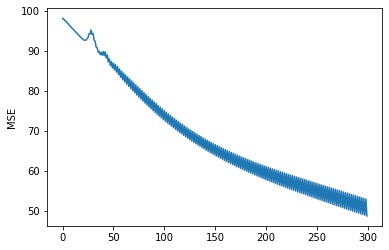

In [10]:
#---------------------------------------------
# APPRENTISSAGE
#---------------------------------------------

#Initialisation des variable
init = tf.global_variables_initializer()

#Demarrage d'une session d'apprentissage
session = tf.Session()
session.run(init)

#Pour la réalisation du graphique pour la MSE
Graphique_MSE=[]


#Pour chaque epoch
for i in range(epochs):

   #Realisation de l'apprentissage avec mise à jour des poids
   session.run(optimiseur, feed_dict = {tf_neurones_entrees_X: train_x, tf_valeurs_reelles_Y:train_y})

   #Calculer l'erreur d'apprentissage
   MSE = session.run(fonction_erreur, feed_dict = {tf_neurones_entrees_X: train_x, tf_valeurs_reelles_Y:train_y})

   #Affichage des informations
   Graphique_MSE.append(MSE)
   print("EPOCH (" + str(i) + "/" + str(epochs) + ") -  MSE: "+ str(MSE))


#Affichage graphique MSE
import matplotlib.pyplot as plt
plt.plot(Graphique_MSE)
plt.ylabel('MSE')
plt.show()

In [11]:
#---------------------------------------------
# VERIFICATION DE L'APPRENTISSAGE
#---------------------------------------------

#Les probabilités de chaque classe 'Mine' ou 'rocher' issues de l'apprentissage sont stockée dans le modèle.
#A l'aide de tf.argmax, on récupére les indexs des probabilités les plus elevées pour chaque sonar
#Ex: Si pour une observation nous avons [0.56, 0.89] renverra 1 car la valeur la plus élevée se trouve à l'index 1
#Ex : Si pour une observation nous avons [0.90, 0.34 ]  renverra 0 car la valeur la plus élevée se trouve à l'index 0
classifications = tf.argmax(reseau, 1)

#Dans le tableau des valeurs réelles :
#Les mines sont encodées comme suit [1,0] l'index ayant la plus grande valeur est 0
#Les rochers ont pour valeur [0,1] sl'index ayant la plus grande valeur est 1

#Si la classification est de [0.90, 0.34 ] l'index ayant la plus grande valeur est 0
#Si c'est une mine [1,0] l'index ayant la plus grande valeur est 0
#Si les deux index sont identiques alors on peut affirmer que c'est une bonne classification
formule_calcul_bonnes_classifications = tf.equal(classifications, tf.argmax(tf_valeurs_reelles_Y,1))


#La précision se calcul en faisant la moyenne (tf.mean)
# des bonnes classifications (aprés les avoir converties en décimale tf.cast, tf.float32)
formule_precision = tf.reduce_mean(tf.cast(formule_calcul_bonnes_classifications, tf.float32))

In [12]:
#-------------------------------------------------------------------------
# PRECISION SUR LES DONNEES DE TESTS
#-------------------------------------------------------------------------

nb_classifications = 0;
nb_bonnes_classifications = 0

#On parcours l'ensemble des données de test (text_x)
for i in range(0,test_x.shape[0]):

    #On récupere les informations
    donneesSonar = test_x[i].reshape(1,60)
    classificationAttendue = test_y[i].reshape(1,2)

    # On réalise la classification
    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X:donneesSonar})

    #On calcule la précision de la classification à l'aide de la formule établie auparavant
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X:donneesSonar, tf_valeurs_reelles_Y:classificationAttendue})


    #On affiche pour observation la classe originale et la classification réalisée
    print(i,"Classe attendue: ", int(session.run(tf_valeurs_reelles_Y[i][1],feed_dict={tf_valeurs_reelles_Y:test_y})), " Classification: ", prediction_run[0] )

    nb_classifications = nb_classifications+1
    if(accuracy_run*100 ==100):
        nb_bonnes_classifications = nb_bonnes_classifications+1


print("-------------")
print("Précision sur les donnees de tests = "+str((nb_bonnes_classifications/nb_classifications)*100)+"%")

0 Classe attendue:  1  Classification:  1
1 Classe attendue:  0  Classification:  0
2 Classe attendue:  1  Classification:  1
3 Classe attendue:  1  Classification:  1
4 Classe attendue:  0  Classification:  0
5 Classe attendue:  1  Classification:  1
6 Classe attendue:  0  Classification:  0
7 Classe attendue:  1  Classification:  1
8 Classe attendue:  1  Classification:  0
9 Classe attendue:  0  Classification:  1
10 Classe attendue:  0  Classification:  0
11 Classe attendue:  0  Classification:  1
12 Classe attendue:  0  Classification:  1
13 Classe attendue:  1  Classification:  0
14 Classe attendue:  0  Classification:  0
-------------
Précision sur les donnees de tests = 66.66666666666666%


In [13]:
#-------------------------------------------------------------------------
# PRECISION SUR LES DONNEES D'APPRENTISSAGE
#-------------------------------------------------------------------------

nb_classifications = 0;
nb_bonnes_classifications = 0
for i in range(0,train_x.shape[0]):

    # On récupere les informations
    donneesSonar = train_x[i].reshape(1, 60)
    classificationAttendue = train_y[i].reshape(1, 2)

    # On réalise la classification
    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X: donneesSonar})

    # On calcule la précision de la classification à l'aide de la formule établie auparavant
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X: donneesSonar, tf_valeurs_reelles_Y: classificationAttendue})

    nb_classifications = nb_classifications + 1
    if (accuracy_run * 100 == 100):
        nb_bonnes_classifications = nb_bonnes_classifications + 1


print("Précision sur les donnees d'apprentissage = " + str((nb_bonnes_classifications / nb_classifications) * 100) + "%")

Précision sur les donnees d'apprentissage = 79.27461139896373%


In [14]:
#-------------------------------------------------------------------------
# PRECISION SUR L'ENSEMBLE DES DONNEES
#-------------------------------------------------------------------------


nb_classifications = 0;
nb_bonnes_classifications = 0
for i in range(0,207):

    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X:X[i].reshape(1,60)})
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X:X[i].reshape(1,60), tf_valeurs_reelles_Y:Y[i].reshape(1,2)})

    nb_classifications = nb_classifications + 1
    if (accuracy_run * 100 == 100):
        nb_bonnes_classifications = nb_bonnes_classifications + 1

print("Précision sur l'ensemble des données = " + str((nb_bonnes_classifications / nb_classifications) * 100) + "%")

session.close()


Précision sur l'ensemble des données = 78.26086956521739%
